## The network of authors who publish articles (Working Papers) on NBER
### Created by - Nikhil Kumar

### Import Packages

In [150]:
import pandas as pd 
import os 
import numpy as np 
import re
import string
import math
import networkx as nx
import matplotlib.pyplot as plt
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize 
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests
from selenium import webdriver
import math
from selenium.common.exceptions import NoSuchElementException
import lxml
%matplotlib inline
from pprint import pprint
from selenium.webdriver.common.by import By

In [2]:
path = r"C:\Users\nikhi\Desktop\NBER Networks/"
path = r"D:\Winter 2020\NBER Analysis/"

### Load Detailed Data on Papers, Authors and Paper Topics

In [3]:
df1 = pd.read_excel(path + "NBER_detailed.xlsx")

,Unnamed: 0,paper,paper month,paper number,paper topic 1,paper topic 2,paper program 1,paper program 2,author 1,author position 1,...,paper program 12,paper program 13,paper program 14,paper group 6,paper topic 17,paper group 7,paper topic 18,paper project 3,paper group 8,paper group 9
0,0,From Micro to Macro Development,February 2021,28423,Development and Growth,Development,Development Economics,Economic Fluctuations and Growth,Francisco J. Buera,Research Associate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Wage Inequality and Labor Rights Violations,February 2021,28475,Labor Economics,Labor Supply and Demand,Law and Economics,Labor Studies,Ioana Marinescu,Faculty Research Fellow,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,The Economic Geography of Global Warming,February 2021,28466,International Economics,Globalization and International Relations,Environment and Energy Economics,Economic Fluctuations and Growth,Jose Luis Cruz Alvarez,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,"Political Violence, Risk Aversion, and Non-Loc...",February 2021,28410,Microeconomics,Economics of Information,Health Care,Health Economics,Dhaval M. Dave,Research Associate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Reparations and Persistent Racial Wealth Gaps,February 2021,28468,Microeconomics,Market Structure and Distribution,Economic Fluctuations and Growth,Labor Studies,Job Boerma,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28962,28962,Unemployment Effects of Minimum Wages,May 1974,39,NaN,NaN,NaN,NaN,Jacob Mincer,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28963,28963,A Monte Carlo Study of Two Robust Alternatives...,September 1974,58,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28964,28964,On a General Computer Algorithm for the Analys...,October 1974,68,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28965,28965,"Data Analysis, Communication, and Control",December 1974,64,NaN,NaN,NaN,NaN,Roy E. Welsch,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [193]:
EXE_PATH = r"C:\Users\nik596\Downloads\chromedriver_win32\chromedriver.exe"
browser = webdriver.Chrome(executable_path=EXE_PATH)
browser.maximize_window()

C:\Users\nik596\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  


C:\Users\nik596\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\nik596\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  after removing the cwd from sys.path.


In [213]:
EXE_PATH = r"C:\Users\nik596\Downloads\chromedriver_win32\chromedriver.exe"
browser = webdriver.Chrome(executable_path=EXE_PATH)
browser.maximize_window()
paper_title = "Dynamic Banking and the Value of Deposits"
base = "https://scholar.google.com"
browser.get(base)
browser.implicitly_wait(10)
html = browser.page_source
soup = BeautifulSoup(html, 'html.parser')
browser.find_element(By.ID, "gs_hdr_tsi").send_keys(paper_title)
browser.find_element(By.ID, "gs_hdr_tsb").click()
html = browser.page_source
soup = BeautifulSoup(html, 'html.parser')
for item in soup.find_all('div', class_="gs_r gs_or gs_scl"):
    if paper_title.lower() in item.text.lower():        
        if "nber.org" in item.text:            
            print("Found on NBER")
        for link in item.find('div', class_='gs_a').find_all('a'):
            a_dict = {}
            a_link = base + link.get('href')
            a_dict['abb_name'] = link.get_text()
            print(a_dict)
            browser.get(a_link)
            temp = ''
            while temp != BeautifulSoup(browser.page_source, 'html.parser').find('button', id="gsc_bpf_more"):

                temp = BeautifulSoup(browser.page_source, 'html.parser').find('button', id="gsc_bpf_more")
                print("page extended")
                browser.find_element(By.ID, "gsc_bpf_more").click()
                browser.implicitly_wait(60)
            a_html = browser.page_source
            a_soup = BeautifulSoup(a_html, 'html.parser')
            a_dict['name'] = a_soup.find('div', id='gsc_prf').find('div', id='gsc_prf_in').get_text()
            i=0
            for paper in a_soup.find('tbody', id='gsc_a_b').find_all('tr', class_='gsc_a_tr'):
                paper_dict = {}
                paper_html = urlopen(base + paper.find('td', class_ = 'gsc_a_t').find('a').get('href')).text
                paper_soup = BeautifulSoup(paper_html, 'html.parser')
                table = paper_soup.find('div', id = 'gsc_oci_table')
                for row in table.find_all('div', class_='gs_scl'):
                    field = row.find('div', class_='gsc_oci_field').text
                    value = row.find('div', class_='gsc_oci_value')
                    if field=='Total citations':
                        years = [x.get_text() for x in row.find_all('div', id = 'gsc_oci_graph_bars')[0].find_all('span', class_ = 'gsc_oci_g_t')]
                        num = [x.get_text() for x in row.find_all('div', id = 'gsc_oci_graph_bars')[0].find_all('a', class_ = 'gsc_oci_g_a')]
                        paper_dict['Citations'] = {years[i]:num[i] for i in range(len(num))}
                        paper_dict['total_citations'] = value.find('a').text
                    elif field =='Scholar articles':
                        continue
                    else:
                        paper_dict[field]=value.text

                paper_dict['name'] = paper.find('td', class_ = 'gsc_a_t').find('a').get_text()
                print(paper_dict['name'])
                #paper_dict['authors'] = paper.find_all('div', class_='gs_gray')[0].get_text()
                #paper_dict['journal'] = paper.find_all('div', class_='gs_gray')[1].get_text()
                #paper_dict['citations'] = paper.find('td', class_='gsc_a_c').get_text()
                #paper_dict['year'] = paper.find('td', class_='gsc_a_y').get_text()
                #print(paper_dict)
                a_dict['paper_'+str(i)] = paper_dict
                i+=1
            years = [x.get_text() for x in a_soup.find_all('div', class_ = 'gsc_md_hist_b')[0].find_all('span', class_ = 'gsc_g_t')]
            num = [x.get_text() for x in a_soup.find_all('div', class_ = 'gsc_md_hist_b')[0].find_all('a', class_ = 'gsc_g_a')]
            a_dict['citations'] = {years[i]:num[i] for i in range(len(num))}
            print(a_dict)
        break    
    else:
        continue

C:\Users\nik596\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  


Found on NBER
{'abb_name': 'P Bolton'}
page extended
page extended


URLError: <urlopen error [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond>

In [ ]:
new = df1["paper month"].str.split(" ", n = 1, expand = True) 
df1["month"]= new[0]  
df1["year"]= new[1]  
df1.drop(columns =["paper month"], inplace = True)
df1 = df1[df1['year'].apply(lambda x: int(x)>= 1981 and int(x) <= 2020)]
df1

,Unnamed: 0,paper,paper number,paper topic 1,paper topic 2,paper program 1,paper program 2,author 1,author position 1,author affiliation 1,...,paper program 14,paper group 6,paper topic 17,paper group 7,paper topic 18,paper project 3,paper group 8,paper group 9,month,year
103,103,Event-day Options,28306,Econometrics,Estimation Methods,Asset Pricing,Monetary Economics,Jonathan H. Wright,Research Associate,Johns Hopkins University,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,December,2020
106,106,Political Parties as Drivers of U.S. Polarizat...,28296,Microeconomics,Welfare and Collective Choice,Political Economy,NaN,Nathan J. Canen,NaN,University of Houston,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,December,2020
110,110,Answering the Queen: Machine Learning and Fina...,28302,Financial Economics,Financial Markets,Asset Pricing,Corporate Finance,Jeremy Fouliard,NaN,London Business School,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,December,2020
119,119,Dynamic Banking and the Value of Deposits,28298,Macroeconomics,Money and Interest Rates,Asset Pricing,Corporate Finance,Patrick Bolton,Research Associate,Columbia University,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,December,2020
127,127,"Dynamic Price Competition, Learning-By-Doing a...",28272,Microeconomics,Game Theory,Industrial Organization,NaN,Andrew Sweeting,Research Associate,University of Maryland,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,December,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28392,28392,Profitability and Stability in International C...,664,International Economics,NaN,International Trade and Investment,International Finance and Macroeconomics,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,April,1981
28393,28393,Asset Holdings and the Life Cycle,614,Other,Econometrics,Public Economics,NaN,Mervyn A. King,Research Associate,House of Lords,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,January,1981
28394,28394,Variations in Infant Mortality Rates among Cou...,615,Public Economics,NaN,Health Economics,NaN,Michael Grossman,Research Associate,City University of New York,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,January,1981
28395,28395,Distributional Implications of Imperfect Capit...,663,Labor Economics,NaN,Labor Studies,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,April,1981


##### Number of unique articles published between 1981 and 2020

In [49]:
_ih[-30:]

['base = "https://scholar.google.com/"\nbrowser.get(base)\n#browser.implicitly_wait(10)\nhtml = browser.page_source\nsoup = BeautifulSoup(html, \'html.parser\')',
 "soup.find_all('input')",
 'soup.find_all(\'input\', id="gs_hdr_tsi")',
 'soup.find_all(\'input\', id="gs_hdr_tsi")\nbrowser.find_element_by_class_name("gs_hdr_tsi")',
 'soup.find_all(\'input\', id="gs_hdr_tsi")\nbrowser.find_element_by_od("gs_hdr_tsi")',
 'soup.find_all(\'input\', id="gs_hdr_tsi")\nbrowser.find_element_by_id("gs_hdr_tsi")',
 'soup.find_all(\'input\', id="gs_hdr_tsi")\nbrowser.find_element_by_id("gs_hdr_tsi").send_keys("From Micro to Macro Development")',
 'soup.find_all(\'input\', id="gs_hdr_tsi")\nbrowser.find_element_by_id("gs_hdr_tsi").send_keys("From Micro to Macro Development")\nbrowser.find_element_by_id("gs_hdr_tsb").click()',
 'soup.find_all(\'input\', id="gs_hdr_tsi")\nbrowser.find_element_by_id("gs_hdr_tsi").send_keys("From Micro to Macro Development")\nbrowser.find_element_by_class_name("gs_r gs_

In [ ]:
len(set(df1['paper']))

27755

##### Number of unique authors who published between 1981 and 2020

In [ ]:
len(set(df['author']))

15351

##### Find the set of unique authors

In [ ]:
author_set = list(set(list(df['author'].unique())))

## Network of co-authors

In [18]:
adj = pd.DataFrame(columns = list(author_set), index = list(author_set)).fillna(0)

In [ ]:
for row in df1.index:
    # for every paper in the dataset
    
    for i in range(1, 17, 1):
        # for every possible author of the paper
        
        focal = df1.loc[row, 'author ' + str(i)]
        for j in range(1, 17, 1):
            # for every possible author of the paper
            
            author = df1.loc[row, 'author ' + str(j)]
            
            # increase the number of papers authored by 'focal' with 'author' by 1
            if not(pd.isnull(focal)) and not(pd.isnull(author)):
                adj[focal][author] = adj[focal][author] + 1

In [ ]:
adj

,Sally E. Sadoff,Jessica Goldberg,Wilson W. Law,Sara Bleich,Sagiri Kitao,Angela Cools,George Evans,Emilson Silva,Nicholas Wilson,Ben Gilbert,...,Peter E. Rossi,Hyun-Soo Choi,Pamela Jervis,Noah S. Miller,Gian Maria Milesi Ferretti,Cormac O'Dea,Richard Morgenstern,Colin Camerer,Marianne Simonsen,James R. Spletzer
Sally E. Sadoff,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Jessica Goldberg,0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Wilson W. Law,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sara Bleich,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sagiri Kitao,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cormac O'Dea,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Richard Morgenstern,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
Colin Camerer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,0,0
Marianne Simonsen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


##### Number of papers published by each author

Mean =  4.049247606019152
Median =  1.0


(array([1.4732e+04, 4.3600e+02, 1.0000e+02, 4.9000e+01, 9.0000e+00,
        1.3000e+01, 5.0000e+00, 5.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([  1.,  20.,  39.,  58.,  77.,  96., 115., 134., 153., 172., 191.]),
 <a list of 10 Patch objects>)

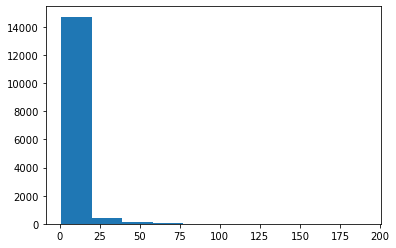

In [ ]:
papers = pd.DataFrame(np.diag(adj), index=[adj.index], columns = ['count'])
print("Mean = ", np.mean(papers['count']))
print("Median = ", np.median(papers['count']))
plt.hist(papers['count'])

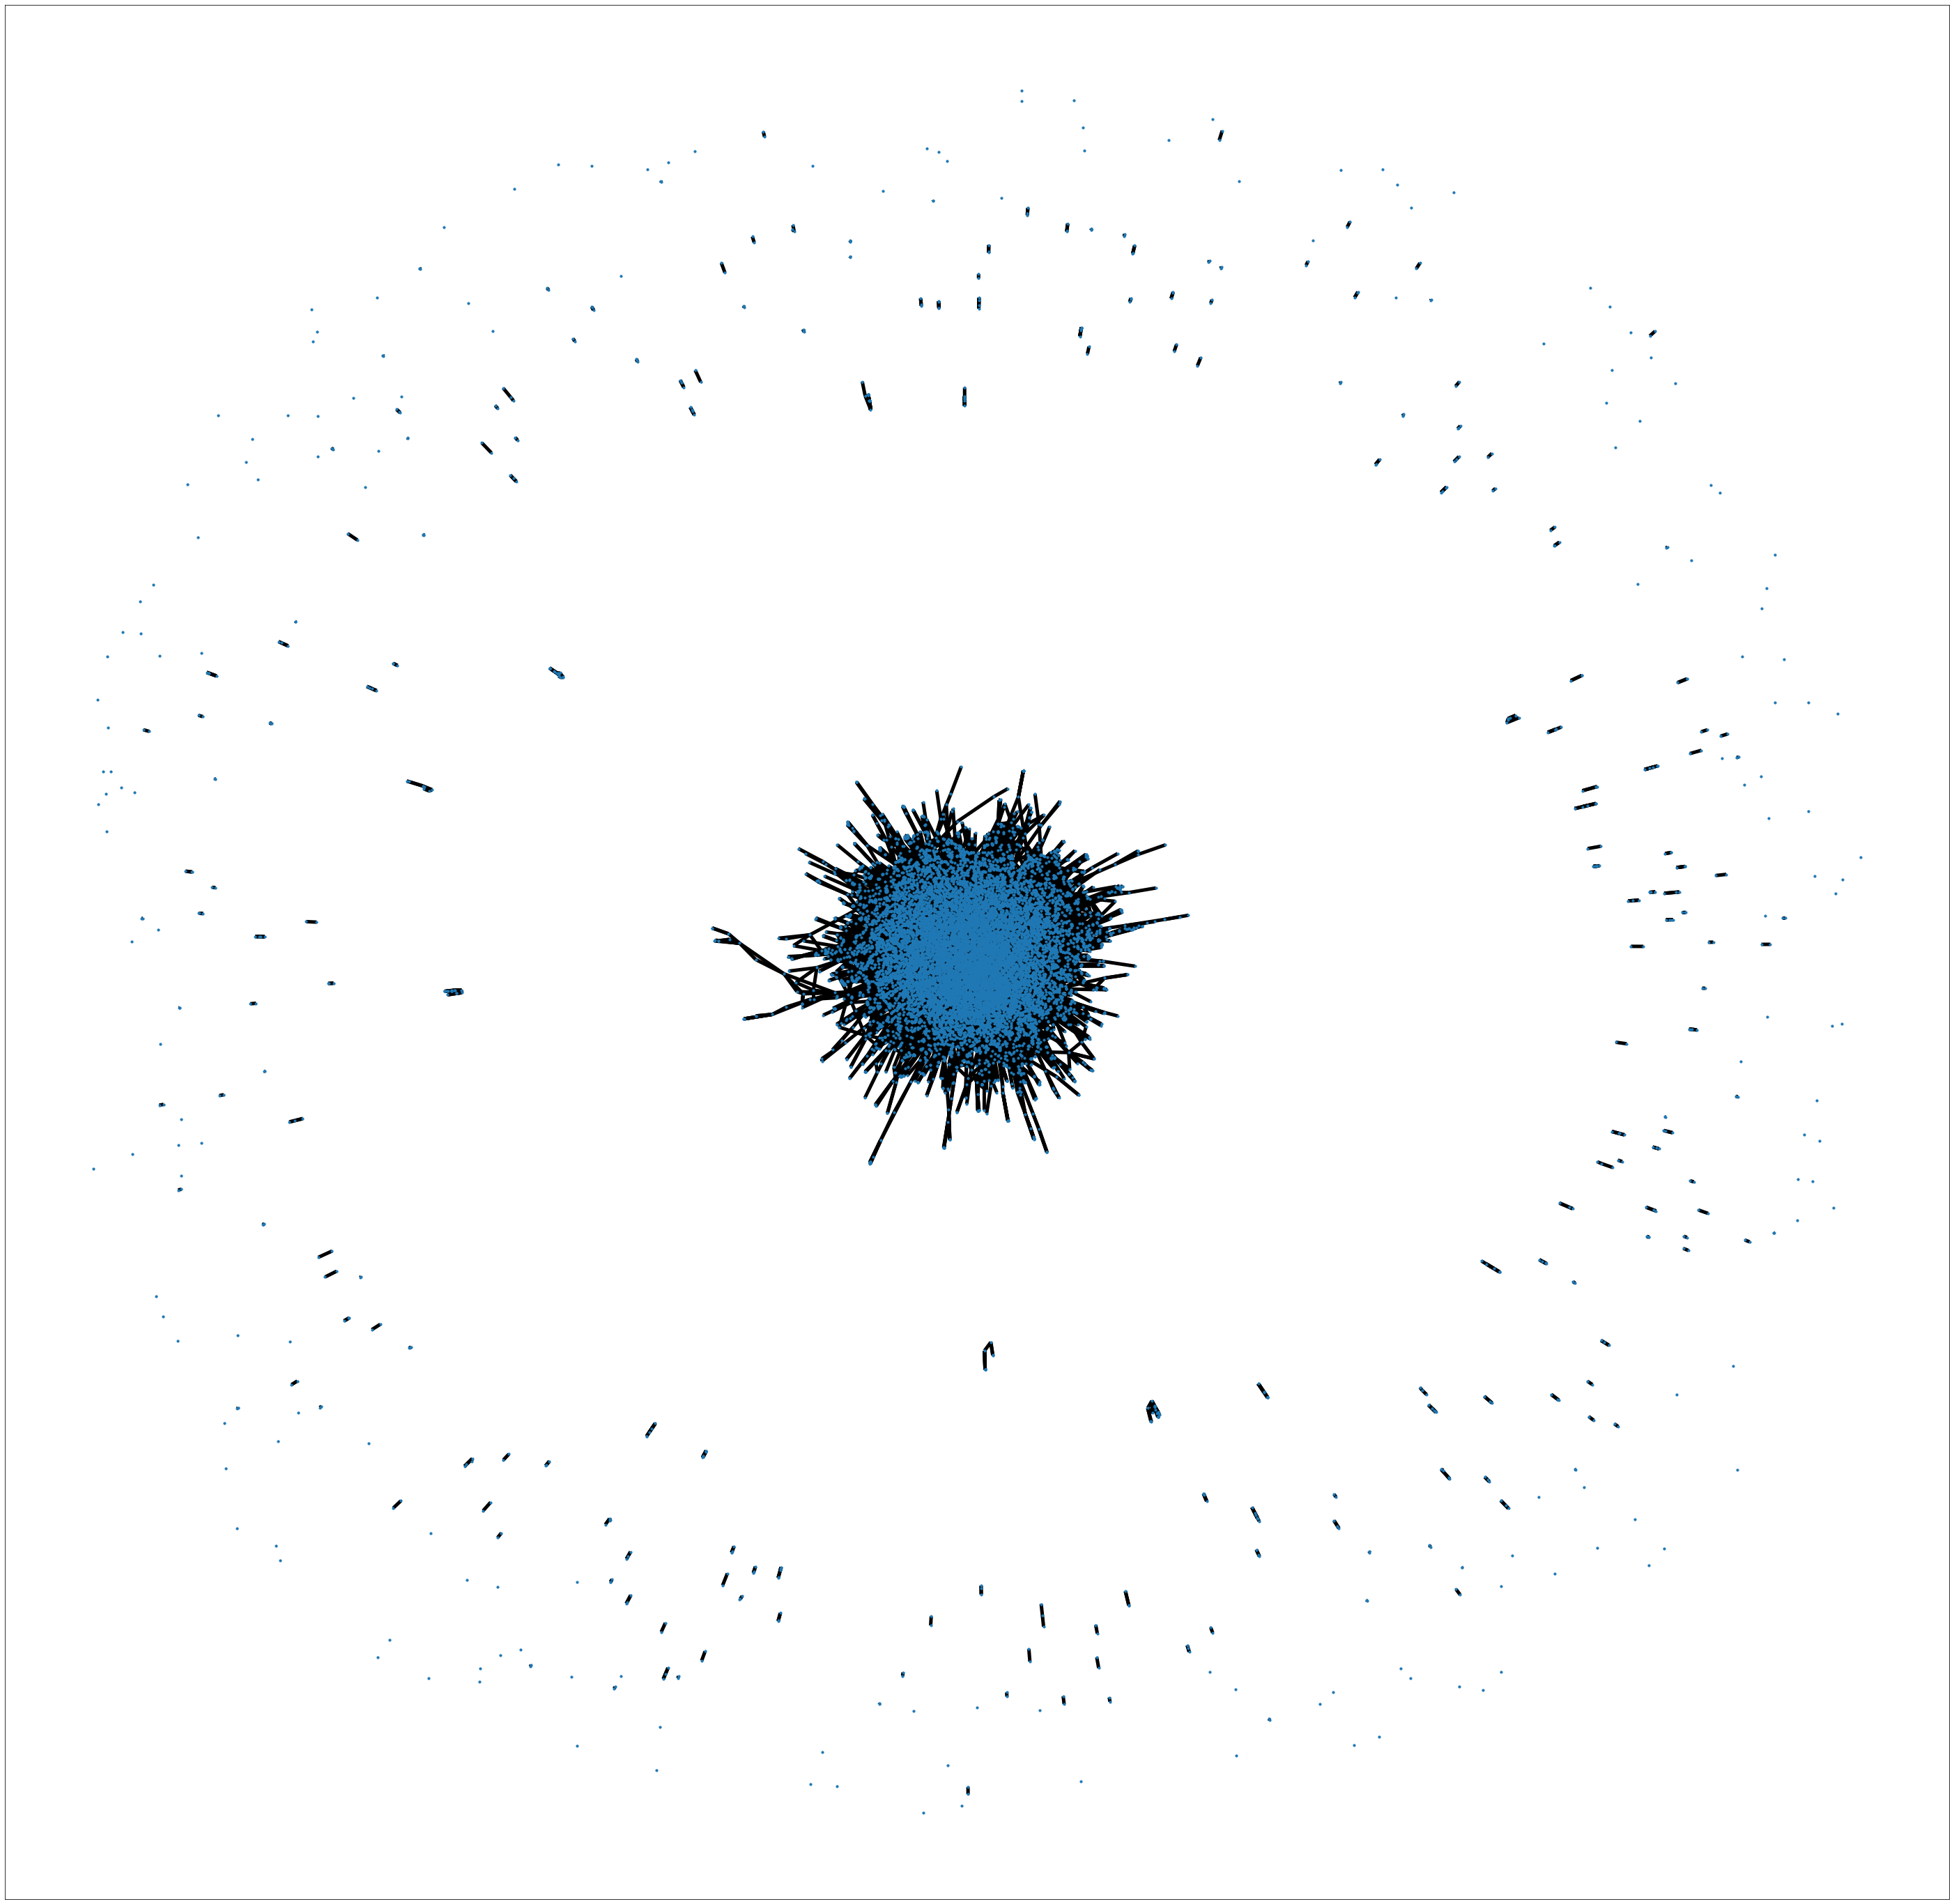

In [ ]:
G = nx.from_pandas_adjacency(adj)
plt.figure(figsize = (50,50))
nx.draw_networkx(G, with_labels=False, width = 5, node_size = 10)

##### Number of collaborators of each author

Mean =  6.795648491954921


(array([1.4254e+04, 8.1400e+02, 1.8000e+02, 5.7000e+01, 2.5000e+01,
        8.0000e+00, 7.0000e+00, 4.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([  2. ,  14.7,  27.4,  40.1,  52.8,  65.5,  78.2,  90.9, 103.6,
        116.3, 129. ]),
 <a list of 10 Patch objects>)

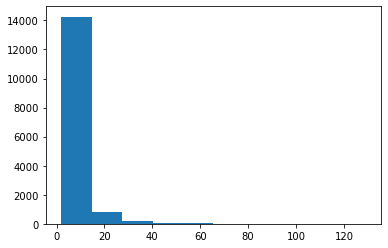

In [ ]:
p = [x[1] for x in nx.degree(G)]
print("Mean = ", np.mean(p))
plt.hist(p)

##### How often do people who share a co-author also co-author?

(array([3597., 1000.,  767.,  922.,  551.,  478.,  517.,   55.,  132.,
        7332.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

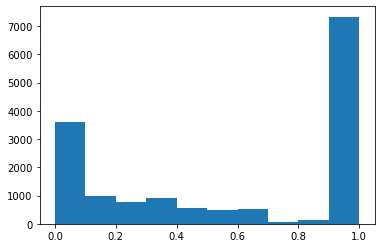

In [ ]:
plt.hist(nx.clustering(G).values())

In [ ]:
print("Average Clustering Coefficient = ", nx.average_clustering(G))
print("Transitivity = ", nx.transitivity(G))
# This means that there are significant number of authors ( > 50%) who have co-authors who also co-author (form triads) - high ACC
# However, when authors who have many co-authors, these co-authors are less likely to have collaborated - low Transitivity

Average Clustering Coefficient =  0.5861881846395217
Transitivity =  0.17520393790742708


##### Authors who are connected to each other through co-authors

In [ ]:
# Largest Connected Component in the Network
largest_cc = max(nx.connected_components(G), key=len)
len(largest_cc)
# This forms about 90% of the authors

14511

##### Degree distribution of number of co-authors

In [ ]:
p = [x for x in nx.degree(G)]
degrees = {k: v for k, v in sorted(p, key=lambda item: item[1], reverse=True)}
degree_values = sorted(set(degrees.values()))
histogram = [sum([x == i for x in degrees.values()])/float(nx.number_of_nodes(G)) for i in degree_values]

In [ ]:
sorted([x for x in G.degree()], key=lambda item: item[1], reverse=True)

[('John A. List', 129),
 ('Jonathan Gruber', 122),
 ('James J. Heckman', 103),
 ('Daron Acemoglu', 102),
 ('Edward L. Glaeser', 97),
 ('Nicholas Bloom', 93),
 ('Laurence J. Kotlikoff', 89),
 ('Janet Currie', 84),
 ('Edward Miguel', 84),
 ('Olivia S. Mitchell', 83),
 ('David Neumark', 83),
 ('Philippe Aghion', 79),
 ('John Van Reenen', 79),
 ('David Card', 78),
 ('Alberto Alesina', 77),
 ('Abhijit Banerjee', 73),
 ('Andrei Shleifer', 72),
 ('Esther Duflo', 72),
 ('Ernst R. Berndt', 71),
 ('Matthew E. Kahn', 71),
 ('David M. Cutler', 67),
 ('Costas Meghir', 65),
 ('Shang-Jin Wei', 64),
 ('Richard B. Freeman', 64),
 ('Robert C. Feenstra', 64),
 ('Amy Finkelstein', 63),
 ('Michael D. Bordo', 63),
 ('Barry Eichengreen', 62),
 ('Hanming Fang', 60),
 ('Josh Lerner', 60),
 ('Viral V. Acharya', 60),
 ('Lawrence F. Katz', 60),
 ('Dean Karlan', 59),
 ('John Whalley', 59),
 ('Steven J. Davis', 59),
 ('Christopher R. Knittel', 58),
 ('Orazio Attanasio', 58),
 ('René M. Stulz', 57),
 ('Yuriy Gorodni

### Preferential Attachment Model (Power Law)

Text(0, 0.5, 'fraction of all authors')

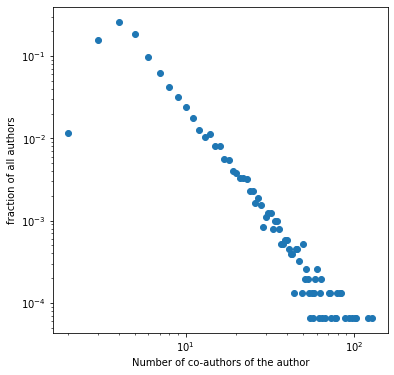

In [ ]:
plt.figure(figsize = (6,6))
plt.scatter(degree_values, histogram)
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Number of co-authors of the author")
plt.ylabel("fraction of all authors")

##### Regression

In [ ]:
import numpy as np
import scipy
my_x = [np.log(item) for item in degree_values]
my_y = [np.log(item) for item in histogram]
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(my_x, my_y)
print("Preferntial attachment explains ", (r_value**2)*100, "% of the variation in degree distribution")
print("log(fraction of authors with n co-authors) = ", intercept, " + ", slope, " * n + error")

Preferntial attachment explains  91.08271581551847 % of the variation in degree distribution
log(fraction of authors with n co-authors) =  1.3751313371375415  +  -2.428230008479765  * n + error


##### Average clustering coefficient vs Degree

Text(0, 0.5, 'Average Clustering Coefficient')

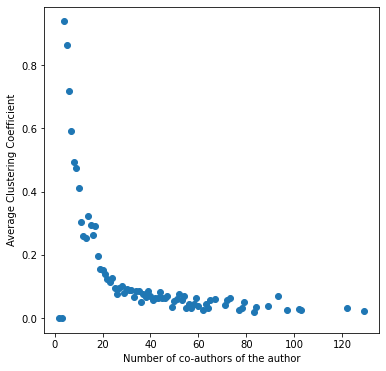

In [ ]:
c = nx.clustering(G)
d = {k: v for k, v in p}
x = pd.DataFrame.from_dict([c, d]).T.rename(columns = {0: 'clustering', 1:'degree'})
y = []
z = []
for t, grp in x.groupby('degree'):
    z.append(sum(grp['clustering'])/len(grp))
    y.append(t)

plt.figure(figsize = (6,6))
plt.scatter(y,z)
plt.xlabel("Number of co-authors of the author")
plt.ylabel("Average Clustering Coefficient")

##### Cumulative pattern of the power law over the years

In [ ]:
clus = []
tra = []
y = []
num = []
for yr in range(1981, 2021, 1):
    df80 = df1[df1['year'].apply(lambda x: int(x)) <= yr]
    temp80 = df[df['year'].apply(lambda x: int(x)) <= yr]
    author_set80 = list(set(list(temp80['author'].unique())))
    adj80 = pd.DataFrame(columns = list(author_set80), index = list(author_set80)).fillna(0)
    for row in df80.index:
        # for every paper in the dataset
    
        for i in range(1, 17, 1):
            # for every possible author of the paper
        
            focal = df80.loc[row, 'author ' + str(i)]
            for j in range(1, 17, 1):
                # for every possible author of the paper
            
                author = df80.loc[row, 'author ' + str(j)]
            
                # increase the number of papers authored by 'focal' with 'author' by 1
                if not(pd.isnull(focal)) and not(pd.isnull(author)):
                    adj80[focal][author] = adj80[focal][author] + 1
    
    y.append(yr)
    num.append(len(adj80))
    G80 = nx.from_pandas_adjacency(adj80)
    clus.append(nx.average_clustering(G80))
    tra.append(nx.transitivity(G80))

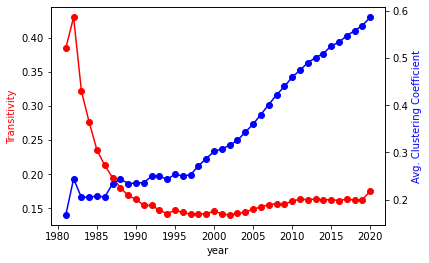

In [ ]:
fig,ax = plt.subplots()
ax.plot(y, tra, color="red", marker="o")
ax.set_xlabel("year")
ax.set_ylabel("Transitivity", color="red")
ax2=ax.twinx()
ax2.plot(y, clus, color="blue",marker="o")
ax2.set_ylabel("Avg. Clustering Coefficient", color="blue")
plt.show()

## Network of Institutions of these authors

In [ ]:
df['authoraffiliation'] = df['authoraffiliation'].apply(lambda x: x.split('\n')[0].strip() if not(pd.isnull(x)) else x)
inst_set = list(set(list(df['authoraffiliation'].unique())))
inst_set.remove(np.nan)

##### Number of unique institutions to which authors who published were affiliated between 1981 and 2020

In [ ]:
len(inst_set)

2873

In [ ]:
adj_inst = pd.DataFrame(columns = list(inst_set), index = list(inst_set)).fillna(0)

In [ ]:
for row in df1.index:
    for i in range(1, 17, 1):
        focal = df1.loc[row, 'author affiliation ' + str(i)]
        #foc = ' '.join(word for word in [w for w in word_tokenize(focal) if not w in set(stopwords.words('english'))])
        for j in range(1, 17, 1):
            author = df1.loc[row, 'author affiliation ' + str(j)]
            #aut = ' '.join(word for word in [w for w in word_tokenize(author) if not w in set(stopwords.words('english'))])
            if not(pd.isnull(focal)) and not(pd.isnull(author)):
                adj_inst[focal.split('\n')[0].strip()][author.split('\n')[0].strip()] = adj_inst[focal.split('\n')[0].strip()][author.split('\n')[0].strip()] + 1

In [ ]:
adj_inst

,Instituto de Investigacion Tecnologica (IIT),National Economic Research Associates,"Economics Dept., University of Minnesota",Harvard T.H. Chan School of Public Health,Beacon Hill Institute at Suffolk University,"Gregory Chow Center for Economic Research, Xiamen University",Bridge Clinical,Children's Investment Fund Foundation,Center for the Economics of Human Development - University of Chicago,United BioSource Corporation,...,MIT Sloan School of Management,Wichita State University,princeton University,Swedish International Development Cooperation Agen,University Capital Strategies Group,Interamerican Development Bank,Belmont University,Geisinger Clinic,University of Alaska Anchorage,"Pandora Media, Inc"
Instituto de Investigacion Tecnologica (IIT),2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
National Economic Research Associates,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Economics Dept., University of Minnesota",0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Harvard T.H. Chan School of Public Health,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Beacon Hill Institute at Suffolk University,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Interamerican Development Bank,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Belmont University,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
Geisinger Clinic,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
University of Alaska Anchorage,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,12,0


##### Number of papers published by authors affiliated to each institution

Mean =  26.23564218586843
Median =  2.0


(array([2.853e+03, 9.000e+00, 5.000e+00, 2.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.000e+00, 6.670e+02, 1.333e+03, 1.999e+03, 2.665e+03, 3.331e+03,
        3.997e+03, 4.663e+03, 5.329e+03, 5.995e+03, 6.661e+03]),
 <a list of 10 Patch objects>)

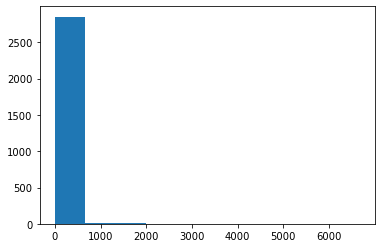

In [ ]:
papers = pd.DataFrame(np.diag(adj_inst), index=[adj_inst.index], columns = ['count'])
print("Mean = ", np.mean(papers['count']))
print("Median = ", np.median(papers['count']))
plt.hist(papers['count'])

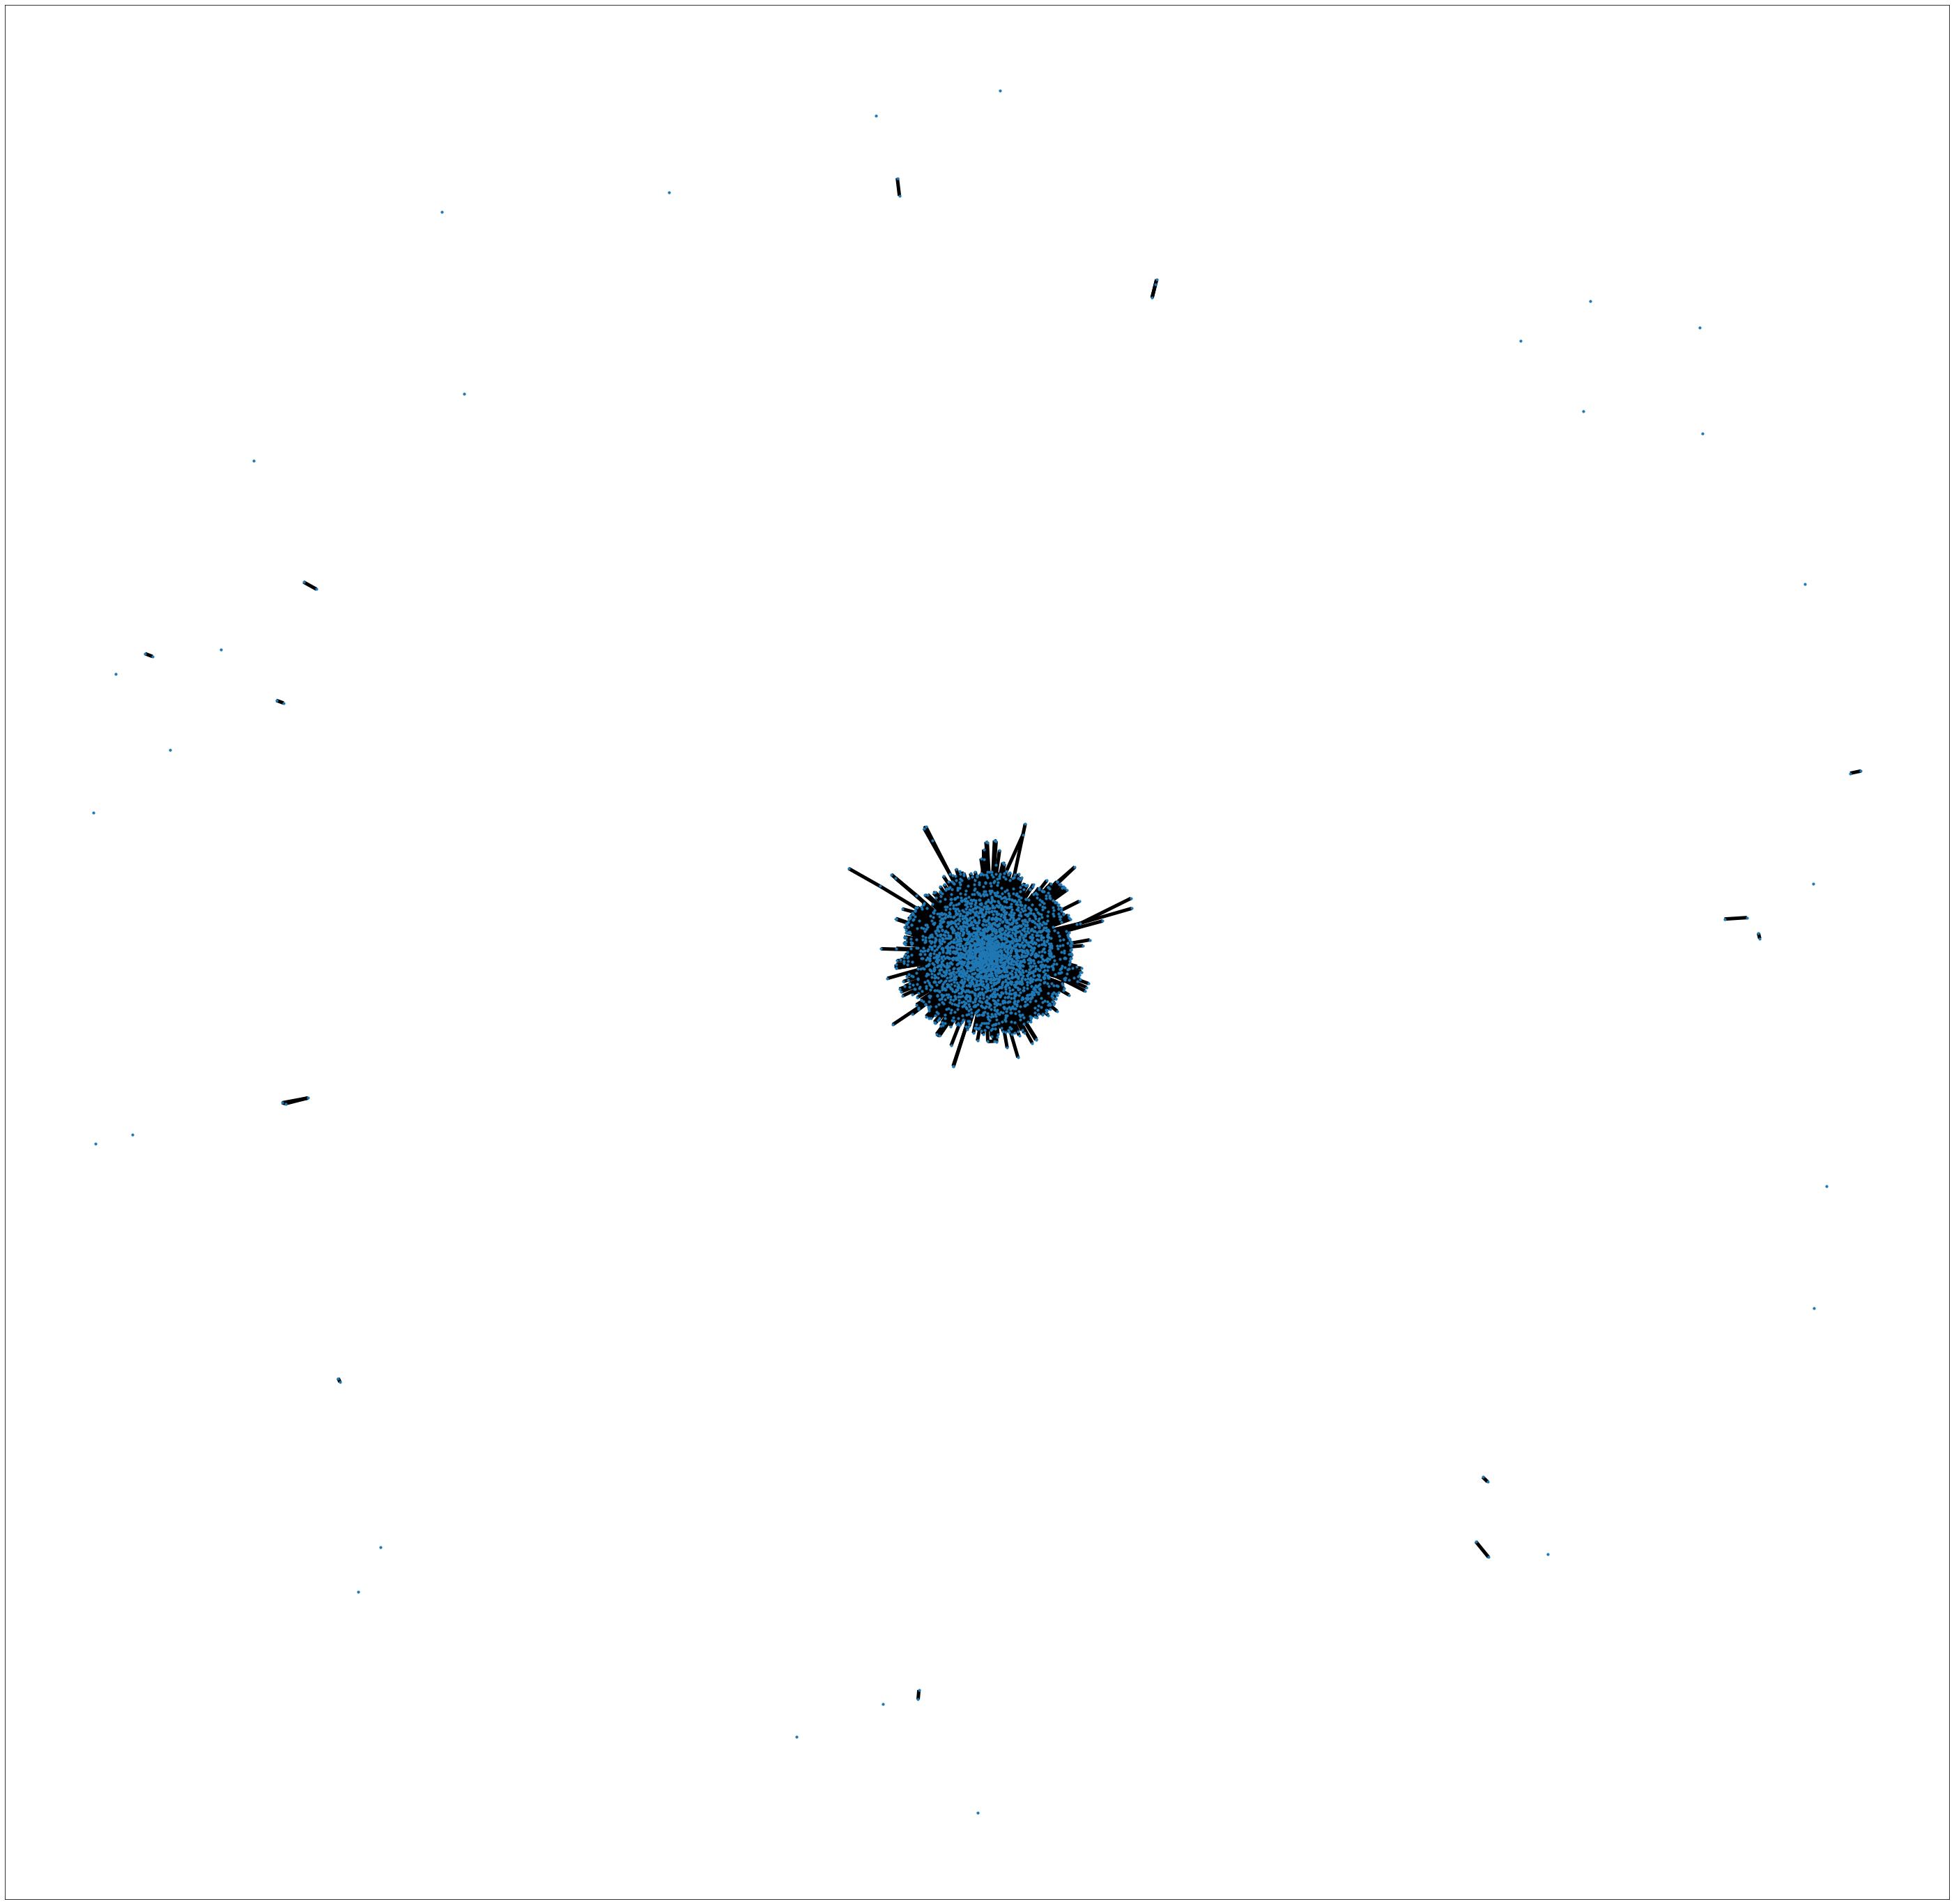

In [ ]:
G1 = nx.from_pandas_adjacency(adj_inst)
plt.figure(figsize = (50,50))
nx.draw_networkx(G1, with_labels=False, width = 5, node_size = 10)

##### Number of institutions that any author at an institution has collaborated with

Mean =  12.20536025060912


(array([2.783e+03, 4.800e+01, 1.900e+01, 7.000e+00, 8.000e+00, 1.000e+00,
        2.000e+00, 3.000e+00, 1.000e+00, 1.000e+00]),
 array([  2. ,  61.1, 120.2, 179.3, 238.4, 297.5, 356.6, 415.7, 474.8,
        533.9, 593. ]),
 <a list of 10 Patch objects>)

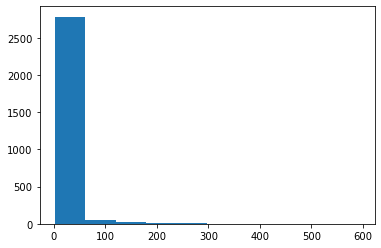

In [ ]:
p = [x[1] for x in nx.degree(G1)]
print("Mean = ", np.mean(p))
plt.hist(p)

##### How often do authors at institutions, who share a co-author at another institution, also co-author?

(array([ 564.,   45.,  106.,  168.,  162.,  204.,  207.,   40.,   83.,
        1294.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

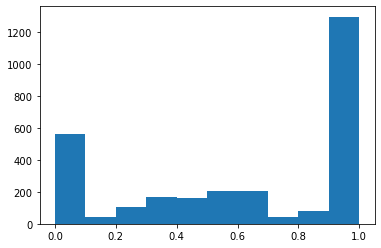

In [ ]:
plt.hist(nx.clustering(G1).values())

In [ ]:
print("Average Clustering Coefficient = ", nx.average_clustering(G1))
print("Transitivity = ", nx.transitivity(G1))
# This means that there are significant number of authors ( > 50%) who have co-authors who also co-author (form triads) - high ACC
# However, when authors who have many co-authors, these co-authors are less likely to have collaborated - low Transitivitynx.average_clustering(G1)

Average Clustering Coefficient =  0.6278104507286759
Transitivity =  0.12733709131636498


##### Institutions who are connected to each other through co-authors

In [ ]:
# Largest Connected Component in the Network
largest_cc = max(nx.connected_components(G1), key=len)
len(largest_cc)
# This forms about 98% of the authors

2818

##### Number of co-authors in institutions different the author's institution

In [ ]:
p1 = [x for x in nx.degree(G1)]
degrees1 = {k: v for k, v in sorted(p1, key=lambda item: item[1], reverse=True)}
degree_values1 = sorted(set(degrees1.values()))
histogram1 = [sum([x == i for x in degrees1.values()])/float(nx.number_of_nodes(G1)) for i in degree_values1]

In [ ]:
sorted([x for x in G1.degree()], key=lambda item: item[1], reverse=True)

[('Harvard University', 593),
 ('University of Chicago', 512),
 ('Columbia University', 427),
 ('Stanford University', 426),
 ('Massachusetts Institute of Technology', 422),
 ('University of California, Berkeley', 411),
 ('University of Pennsylvania', 380),
 ('Yale University', 343),
 ('Princeton University', 297),
 ('New York University', 293),
 ('Northwestern University', 270),
 ('University of Michigan', 266),
 ('University of Maryland', 260),
 ('Cornell University', 249),
 ('Boston University', 247),
 ('Duke University', 242),
 ('London School of Economics', 223),
 ('University of California, Los Angeles', 218),
 ('Dartmouth College', 212),
 ('University of Southern California', 196),
 ('Johns Hopkins University', 196),
 ('University of California, San Diego', 191),
 ('University of California, Davis', 184),
 ('Brown University', 166),
 ('University of Virginia', 166),
 ('The Ohio State University', 161),
 ('University of Toronto', 161),
 ('Georgetown University', 150),
 ('Universi

## Preferential Attachment Model (Power Law)

Text(0, 0.5, 'fraction of all institutions')

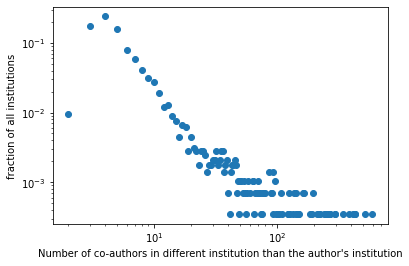

In [ ]:
plt.scatter(degree_values1, histogram1)
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Number of co-authors in different institution than the author's institution")
plt.ylabel("fraction of all institutions")

##### Regression

In [ ]:
my_x = [np.log(item) for item in degree_values1]
my_y = [np.log(item) for item in histogram1]
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(my_x, my_y)
print("Preferntial attachment explains ", (r_value**2)*100, "% of the variation in degree distribution")
print("log(fraction of authors with n co-authors) = ", intercept, " + ", slope, " * n + error")

Preferntial attachment explains  77.68007265412895 % of the variation in degree distribution
log(fraction of authors with n co-authors) =  -2.0323812200264237  +  -1.1371637556471899  * n + error


##### Average clustering coefficient vs Degree

Text(0, 0.5, 'Average Clustering Coefficient')

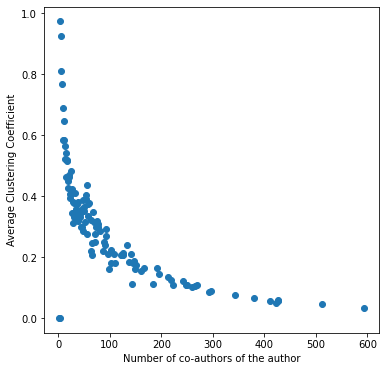

In [ ]:
c = nx.clustering(G1)
d = {k: v for k, v in p1}
x = pd.DataFrame.from_dict([c, d]).T.rename(columns = {0: 'clustering', 1:'degree'})
y = []
z = []
for t, grp in x.groupby('degree'):
    z.append(sum(grp['clustering'])/len(grp))
    y.append(t)
plt.figure(figsize = (6,6))
plt.scatter(y,z)
plt.xlabel("Number of co-authors of the author")
plt.ylabel("Average Clustering Coefficient")

##### Cumulative pattern of the power law over the years

In [ ]:
clus = []
tra = []
y = []
num = []
for yr in range(1981, 2021, 1):
    df80 = df1[df1['year'].apply(lambda x: int(x)) <= yr]
    temp80 = df[df['year'].apply(lambda x: int(x)) <= yr]
    author_set80 = list(set([x for x in temp80['authoraffiliation'].unique() if not(pd.isnull(x))]))
    adj80 = pd.DataFrame(columns = list(author_set80), index = list(author_set80)).fillna(0)
    for row in df80.index:
        # for every paper in the dataset
    
        for i in range(1, 17, 1):
            # for every possible author of the paper
        
            focal = df80.loc[row, 'author affiliation ' + str(i)]
            for j in range(1, 17, 1):
                # for every possible author of the paper
            
                author = df80.loc[row, 'author affiliation ' + str(j)]
            
                # increase the number of papers authored by 'focal' with 'author aiifiliation ' by 1
                if not(pd.isnull(focal)) and not(pd.isnull(author)):
                    try:
                        adj80[focal][author] = adj80[focal][author] + 1
                    except:
                        focal = focal.split('\r')[0]
                        author = author.split('\r')[0]
                        adj80[focal][author] = adj80[focal][author] + 1
                    
    
    y.append(yr)
    num.append(len(adj80))
    G80 = nx.from_pandas_adjacency(adj80)
    clus.append(nx.average_clustering(G80))
    tra.append(nx.transitivity(G80))

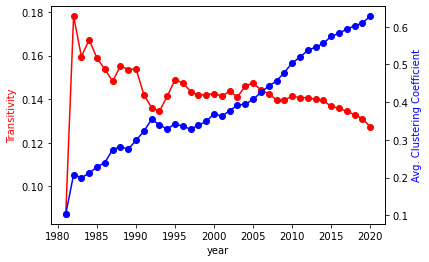

In [ ]:
fig,ax = plt.subplots()
ax.plot(y, tra, color="red", marker="o")
ax.set_xlabel("year")
ax.set_ylabel("Transitivity", color="red")
ax2=ax.twinx()
ax2.plot(y, clus, color="blue",marker="o")
ax2.set_ylabel("Avg. Clustering Coefficient", color="blue")
plt.show()